<div style="float: right; width: 50%;">
<p style="margin: 0; text-align:right; padding-button: 100px;">Pol Major Munich</p>
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipologia i cicle de vida de les dades · Pràctica 2</p>
<p style="margin: 0; text-align:right;">2018-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>

# 1-3. Descripció i neteja de les dades:

· Les dades utilitzades es poden descarregar a https://www.kaggle.com/c/titanic/data

· El fitxer "train.csv" conté dades amb etiqueta (label), mentre que el "test.csv" serveix per evaluar els models.

· Ambdós fitxer es prepararan conjuntament, de manera que el primer pas és la càrrega de les dades.

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

**1.Descripció del dataset:** La pregunta que es pretén respondre amb aquestes dades és **si una persona va sobreviure o no** a l'enfonsament del titànic.

Com es veu a la taula següent, es diposa de diverses variables: edad, sexe, classe, número de germans, pares i fills, etc.

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survived</td>
<td>Survived</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

**2. Estudi inicial, integració i selecció de les dades:**

In [2]:
print("Nom i tipus de les columnes:\n",train.dtypes)

Nom i tipus de les columnes:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
print("La classe és l'atribut 'Survived', que pren el valor 1 quan la persona sobreviu i 0 en cas contrari.")
print("Els atributs categòrics són: pclass, name, sex, ticket, cabin i embarked")
print("Els atributs numèrics són: age, sibsp, parch i fare")

La classe és l'atribut 'Survived', que pren el valor 1 quan la persona sobreviu i 0 en cas contrari.
Els atributs categòrics són: pclass, name, sex, ticket, cabin i embarked
Els atributs numèrics són: age, sibsp, parch i fare


In [4]:
def print_survived_by(df, atributs):
    for atribut in atributs:
        print(df[[atribut, 'Survived']].groupby([atribut], as_index=False).mean().sort_values(by='Survived', ascending=False),"\n")

print("Qui va sobreviure? (variables categòriques i no-continues)")        
print_survived_by(train,["Pclass","Sex","SibSp","Embarked","Parch"])

Qui va sobreviure? (variables categòriques i no-continues)
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 

      Sex  Survived
0  female  0.742038
1    male  0.188908 

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000 



In [5]:
print("Mitjana de les variables continues. No hi ha diferències significatives per 'Age', però sí per 'Fare'. Com més havies pagat, més possibilitat de sobreviure.")
g_survived = train[["Age","Fare","Survived"]].groupby("Survived")
g_survived.mean()

Mitjana de les variables continues. No hi ha diferències significatives per 'Age', però sí per 'Fare'. Com més havies pagat, més possibilitat de sobreviure.


,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


Sempre s'ha dit que en l'enfonsament del Titànic, la prioritat era salvar els nens i les dones.
El cas de les dones ha quedat demostrat, un 74% de les dones va sobreviure mentre que només ho va fer el 19% dels homes.
Anem a veure ara el cas dels nens. Es veu clarament com tenir menys de 22 anys incrementava considerablement la possibilitat de sobreviure.


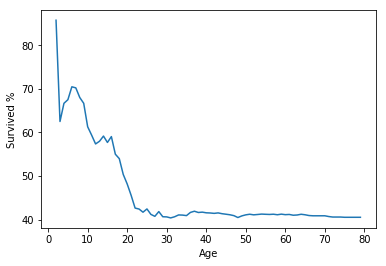

In [16]:
import seaborn as sns
print("Sempre s'ha dit que en l'enfonsament del Titànic, la prioritat era salvar els nens i les dones.")
print("El cas de les dones ha quedat demostrat, un 74% de les dones va sobreviure mentre que només ho va fer el 19% dels homes.")
print("Anem a veure ara el cas dels nens. Es veu clarament com tenir menys de 22 anys incrementava considerablement la possibilitat de sobreviure.")
g_survived_0 = g_survived.get_group(0)
g_survived_1 = g_survived.get_group(1)

s_list = []
for x in range(2,80):
    g0 = g_survived_0[g_survived_0["Age"]<x]["Age"].count()
    g1 = g_survived_1[g_survived_1["Age"]<x]["Age"].count()
    gtotal = g0+g1
    s_list.append([x,g1*100/gtotal])

s_frame = pd.DataFrame(s_list, columns=["Age","Survived %"])
sns.lineplot(x="Age", y="Survived %", data=s_frame)

In [7]:
print("Què ens diuen els dos atributs restants, 'Cabin' i 'Ticket'?")
print("Valors únics per 'Cabin': ",train["Cabin"].nunique())
print("Valors únics per 'Ticket': ",train["Ticket"].nunique())
print("Cap dels dos atributs és numèric i presenten valors nuls o una gran quantitat de valors únics diferents. A més, el tiquet sembla ser irrellevant respecte a sobreviure o no.")
print("Així doncs, es descartaran aquests dos atributs a més de la Id, tan en el conjunt d'entrenament com en el de test.")

Què ens diuen els dos atributs restants, 'Cabin' i 'Ticket'?
Valors únics per 'Cabin':  147
Valors únics per 'Ticket':  681
Cap dels dos atributs és numèric i presenten valors nuls o una gran quantitat de valors únics diferents. A més, el tiquet sembla ser irrellevant respecte a sobreviure o no.
Així doncs, es descartaran aquests dos atributs a més de la Id, tan en el conjunt d'entrenament com en el de test.


In [8]:
test_index = test["PassengerId"]
train.drop("PassengerId", axis=1, inplace=True)
test.drop("PassengerId", axis=1, inplace=True)
train.drop("Cabin", axis=1, inplace=True)
train.drop("Ticket", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)

**Resum:**

· L'atribut classe és 'Survived'.

· Els atributs rellevants, els quals s'utilitzaran, són: 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' i 'Embarked'.

· Al següent apartat s'aplicarà una neteja de dades, que consitirà en: detecció de valors extrems i de valors nulls (o zeros) i una mica d'enginyeria d'atributs.

** 3.Neteja de les dades**

In [9]:
print("\nMirem si hi ha valors nuls que caldrà tractar:\n")
train.info()
print("\nAl conjunt d'entrenament hi ha valors nuls als atributs: age i embarked.\n")
test.info()
print("\nAl conjunt de test hi ha valors nuls als atributs: age i fare.")


Mirem si hi ha valors nuls que caldrà tractar:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB

Al conjunt d'entrenament hi ha valors nuls als atributs: age i embarked.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB



· A part dels atributs nuls, també caldrà tractar els outliers (valors extrems).

· Es considera un valor extrem aquell que està més enllà de 3 desviacions estàndard.

· Si es detecta un valor extrem en una columna, aquest serà substituït per el valor màxim de la mateixa. La idea és mirar de mantenir la informació, però sense que els valors extrems afectin tant a l'estadística. És a dir, es vol suavitzar-los.

· Començant pels valors nulls. L'atribut edat **es calcularà amb un arbre de regressió:**

In [10]:
#Tractament dels valors nulls:
clean_train = train.copy()
clean_test = test.copy()

#És mirarà d'inferir l'edat a partir dels altres atributs i un model de regressió.
from sklearn.tree import DecisionTreeRegressor

#S'entrena un model d'arbre de regresió NOMÉS amb les dades d'entrenament. 
#NO volem en cap cas que les dades de test participin en l'entrenament (!).

predicted_null_age = []

ct_train = clean_train[clean_train["Age"].notnull()].copy()
ct_test = clean_train[clean_train["Age"].isnull()].copy()
ct_train.dropna(inplace=True)

y = ct_train["Age"]
X = ct_train.drop(["Age","Name","Survived"], axis=1)
XX = pd.get_dummies(X)
#Entrenem només 1 sola vegada per el conjunt d'entrenament.
DTR = DecisionTreeRegressor().fit(XX, y)

#Predict train missing ages:
X_to_predict = pd.get_dummies(ct_test.drop(["Age","Name","Survived"], axis=1))
predicted_null_age.append(DTR.predict(X_to_predict))

#Predict test missing ages:
ct_test2 = clean_test[clean_test["Age"].isnull()].copy()
X_to_predict2 = pd.get_dummies(ct_test2.drop(["Age","Name"], axis=1))
predicted_null_age.append(DTR.predict(X_to_predict2))

#Llistes d'edats calculades per l'arbre de decisió
train_ages = list(map(int,predicted_null_age[0].tolist()))
test_ages = list(map(int,predicted_null_age[1].tolist()))
print("Els valors predits són:\n")
print(train_ages)
print(test_ages)

Els valors predits són:

[33, 31, 15, 32, 19, 27, 27, 22, 24, 32, 30, 36, 22, 24, 36, 40, 40, 27, 30, 22, 30, 30, 27, 29, 15, 30, 44, 30, 29, 30, 24, 8, 22, 48, 24, 16, 23, 31, 15, 44, 22, 8, 44, 27, 24, 23, 14, 15, 30, 24, 44, 22, 44, 22, 34, 64, 40, 44, 22, 24, 30, 30, 30, 8, 15, 27, 27, 26, 47, 32, 19, 19, 36, 13, 22, 28, 27, 21, 24, 27, 19, 34, 25, 32, 30, 44, 26, 19, 16, 30, 35, 44, 30, 34, 21, 30, 47, 34, 24, 16, 26, 36, 16, 50, 30, 39, 32, 24, 38, 24, 4, 19, 23, 44, 24, 44, 30, 25, 24, 22, 17, 33, 30, 16, 14, 32, 27, 28, 27, 15, 44, 21, 39, 27, 29, 42, 27, 19, 27, 29, 35, 34, 15, 29, 16, 40, 50, 36, 16, 34, 27, 27, 54, 19, 36, 39, 32, 44, 21, 13, 44, 16, 56, 39, 19, 29, 44, 24, 30, 58, 8, 33, 24, 16, 26, 27, 13]
[27, 61, 24, 13, 25, 29, 50, 44, 23, 27, 35, 30, 27, 57, 26, 22, 29, 30, 44, 44, 24, 22, 34, 44, 44, 15, 45, 34, 54, 50, 32, 16, 36, 44, 42, 24, 44, 16, 64, 25, 15, 35, 27, 19, 30, 29, 22, 44, 26, 13, 14, 42, 44, 27, 39, 42, 25, 44, 15, 32, 22, 30, 24, 30, 28, 24, 24, 23

In [11]:
#L'atribut 'Age' s'emplena amb els valors de les llistes.
clean_train.at[clean_train["Age"].isnull(), "Age"] = train_ages
clean_test.at[clean_test["Age"].isnull(), "Age"] = test_ages

#L'atribut Embarked s'emplena amb un valor aleatori (propagació cap endavant)
clean_train.Embarked.fillna(method="ffill", inplace=True)

#L'atribut Fare s'emplena amb el valor Mediana, ja que la desviació estàndard és molt gran.
clean_test.Fare.fillna(clean_test.Fare.median(), inplace=True)

print("Ja no hi ha valors nuls: ")
clean_train.info()
clean_test.info()

Ja no hi ha valors nuls: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


· A continuació es calculen els valors extrems:

In [12]:
import numpy as np

#Descripció dels valors numèrics
numeric_train = clean_train[["Age","SibSp","Parch","Fare"]]
print("Descripció de les variables numèriques:\n",numeric_train.describe())

print("\nHi ha valors molt extrems en els atributs 'SibSp', 'Parch' i 'Fare' (només cal comparar el valor màxim amb la mitjana).")
print("Els valors extrems ( x > 3 std) es substituiran per el valor màxim del conjunt, per mirar de mantenir el màxim d'informació.")

#Pels valors numèrics, s'agafen només aquells que estan dintre de 3 desviacions estàndard:
std3 = np.abs(numeric_train-numeric_train.mean()) <= (3*numeric_train.std())

to_keep = numeric_train[std3]
clean_train[["Age","SibSp","Parch","Fare"]] = to_keep.fillna(to_keep.max())
print("\nDescripció després de tractar els valors extrems:\n",clean_train[["Age","SibSp","Parch","Fare"]].describe())

Descripció de les variables numèriques:
               Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.463715    0.523008    0.381594   32.204208
std     13.811493    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     21.000000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     37.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

Hi ha valors molt extrems en els atributs 'SibSp', 'Parch' i 'Fare' (només cal comparar el valor màxim amb la mitjana).
Els valors extrems ( x > 3 std) es substituiran per el valor màxim del conjunt, per mirar de mantenir el màxim d'informació.

Descripció després de tractar els valors extrems:
               Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.448002    0.452301    0.345679   29.635367
std     13.76

In [13]:
numeric_test = clean_test[["Age","SibSp","Parch","Fare"]]
std3 = np.abs(numeric_test-numeric_test.mean()) <= (3*numeric_test.std())
to_keep = numeric_test[std3]
clean_test[["Age","SibSp","Parch","Fare"]] = to_keep.fillna(to_keep.max())
clean_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.575359,0.409091,0.346890,31.795855
std,0.841838,13.607253,0.683911,0.717545,40.001264
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,40.000000,1.000000,0.000000,31.471875
max,3.000000,67.000000,3.000000,3.000000,164.866700


· Una vegada emplenats els valors nulls i els zeros i tractat els valors extrems, es procedeix a l'enginyeria d'atributs.

· La idea aquí és:

1. Extreure el títol dels noms.
2. Crear rangs a partir dels atributs 'Age' i 'Fare'. És a dir, generar dos nous atributs ordinals.

In [14]:
#Es fa una altra còpia de seguretat
train_test = [clean_train.copy(), clean_test.copy()]
age_labels = ["(0, 21]", "(21, 28]","(28, 37]","(37, 71]"]
age_bins = [0,21,28,37,71]

fare_labels = ["(0, 8]","(8, 14]","(14, 31]","(31, 165]"]
fare_bins = [-0.5,8,14,31,165]
                                                            

for tt in train_test:
    tt['L_Age'] = pd.cut(tt['Age'], bins=age_bins, labels=age_labels)
    tt['L_Fare'] = pd.cut(tt['Fare'], bins=fare_bins, labels=fare_labels)
    tt['Title'] = tt["Name"].str.extract(' ([A-Za-z]+)\.', expand=False).replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    tt['Title'] = tt['Title'].replace('Mlle', 'Miss')
    tt['Title'] = tt['Title'].replace('Ms', 'Miss')
    tt['Title'] = tt['Title'].replace('Mme', 'Mrs')

#Es recupera la el conjunt de test
train_test[1]["PassengerId"] = test_index
print("Qui va sobreviure segons el títol?")
print_survived_by(train_test[0],["Title"])
print("Primeres 5 files de 'Train':\n",train_test[0][:5])
print("\nPrimeres 5 files de 'Test':\n",train_test[1][:5])

Qui va sobreviure segons el títol?
    Title  Survived
3     Mrs  0.793651
1    Miss  0.702703
0  Master  0.575000
4   Other  0.347826
2      Mr  0.156673 

Primeres 5 files de 'Train':
    Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked     L_Age     L_Fare Title  
0    male  22.0    1.0    0.0   7.2500        S  (21, 28]     (0, 8]    Mr  
1  female  38.0    1.0    0.0  71.2833        C  (37, 71]  (31, 165]   Mrs  
2  female  26.0    0.0    0.0   7.9250        S  (21, 28]     (0, 8]  Miss  
3  female  35.0    1.0    0.0  53.1000        S  (28, 37]  (

**Conclusió:**

· S'han tractat els valors nuls, els zeros i els outliers (sempre impedint qualsevol tipus de filtració d'informació al conjunt de test (!)).

· S'han generat noves variables ('Title') i s'han discretitzat 'Age' i 'Fare'.

· A continuació es guarden els dos nous fitxers, preparats per a l'anàlisi.

In [15]:
train_test[0].to_csv("cleaned_train.csv", index=False)
train_test[1].to_csv("cleaned_test.csv", index=False)